# Spam dataset with ensemble methods

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)

# The spam email dataset

In [2]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


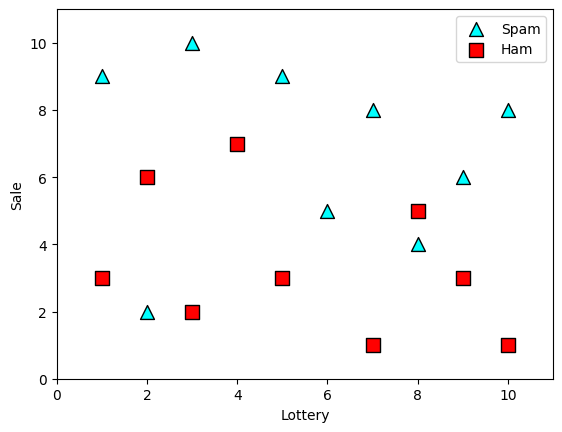

In [3]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
utils.plot_points(features, labels)

In [4]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

# Training a decision tree

In [5]:
utils.display_tree(decision_tree_classifier)

ModuleNotFoundError: No module named 'sklearn.externals.six'

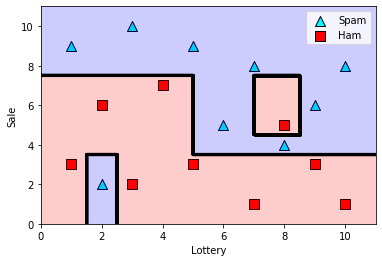

In [ ]:
utils.plot_model(features, labels, decision_tree_classifier)

# Training a random forest by hand

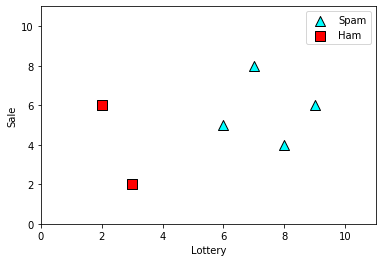

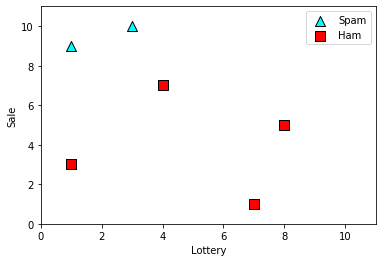

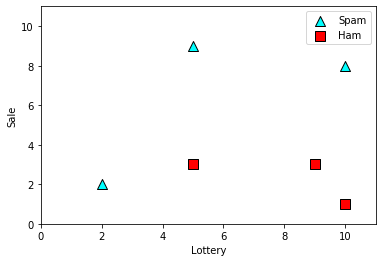

In [ ]:
first_batch = spam_dataset.loc[[0,1,2,3,4,5]]
features1 = first_batch[['Lottery', 'Sale']]
labels1 = first_batch['Spam']
utils.plot_points(features1, labels1)
plt.show()

second_batch = spam_dataset.loc[[6,7,8,9,10,11]]
features2 = second_batch[['Lottery', 'Sale']]
labels2 = second_batch['Spam']
utils.plot_points(features2, labels2)
plt.show()

third_batch = spam_dataset.loc[[12,13,14,15,16,17]]
features3 = third_batch[['Lottery', 'Sale']]
labels3 = third_batch['Spam']
utils.plot_points(features3, labels3)

Weak learner 1 training accuracy: 1.0


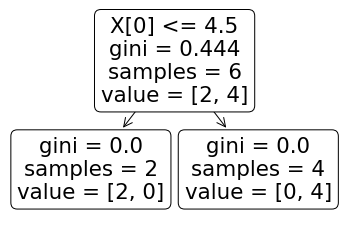

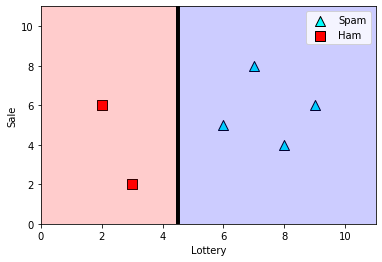

Weak learner 2 training accuracy: 1.0


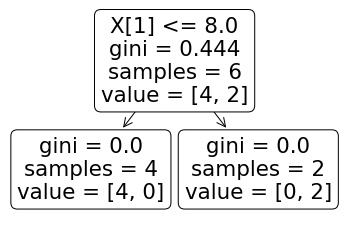

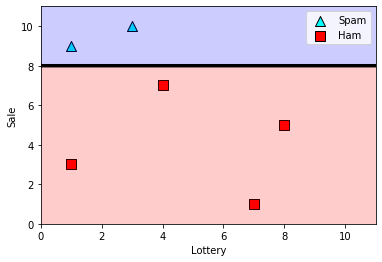

Weak learner 3 training accuracy: 0.8333333333333334


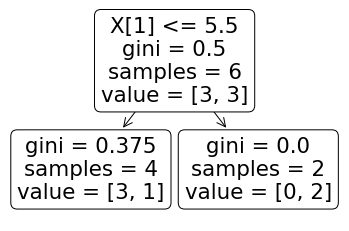

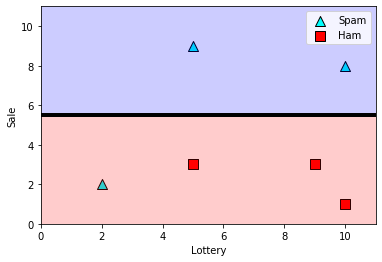

In [ ]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt1.fit(features1, labels1)
print("Weak learner 1 training accuracy:", dt1.score(features1, labels1))
tree.plot_tree(dt1, rounded=True)
plt.show()
utils.plot_model(features1, labels1, dt1)

dt2 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt2.fit(features2, labels2)
print("Weak learner 2 training accuracy:", dt2.score(features2, labels2))
tree.plot_tree(dt2, rounded=True)
plt.show()
utils.plot_model(features2, labels2, dt2)

dt3 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt3.fit(features3, labels3)
print("Weak learner 3 training accuracy:", dt3.score(features3, labels3))
tree.plot_tree(dt3, rounded=True)
plt.show()
utils.plot_model(features3, labels3, dt3)

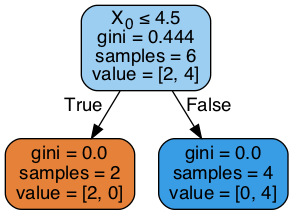

In [ ]:
utils.display_tree(dt1)

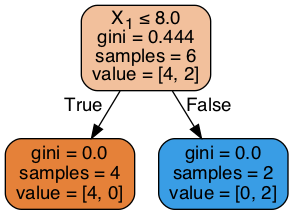

In [ ]:
utils.display_tree(dt2)

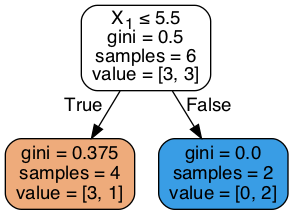

In [ ]:
utils.display_tree(dt3)

# Training a random forest using sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(random_state=0, n_estimators=5, max_depth=1)
random_forest_classifier.fit(features, labels)
random_forest_classifier.score(features, labels)

0.8333333333333334

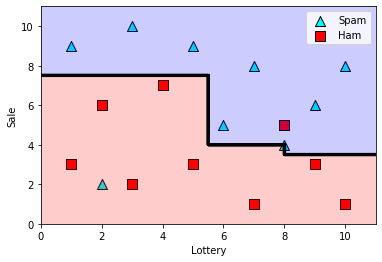

In [ ]:
utils.plot_model(features, labels, random_forest_classifier)

****************************** Estimator ******************************


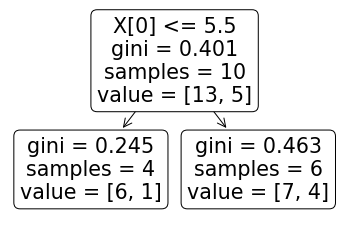

/Users/luisserrano/Documents/Book/code/manning/Chapter_12_Ensemble_Methods/utils.py:46: UserWarning: No contour levels were found within the data range.
  pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)


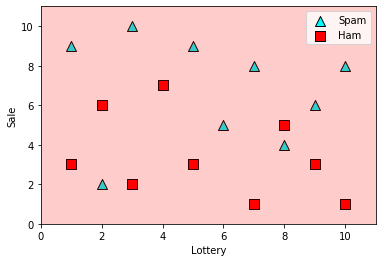

****************************** Estimator ******************************


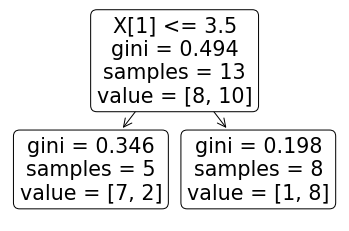

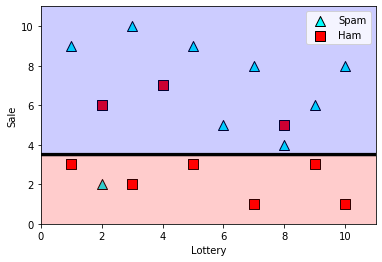

****************************** Estimator ******************************


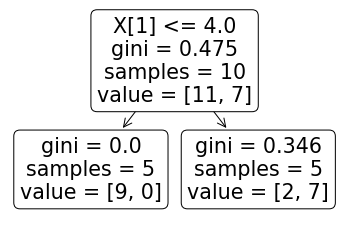

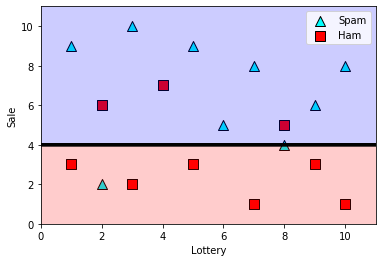

****************************** Estimator ******************************


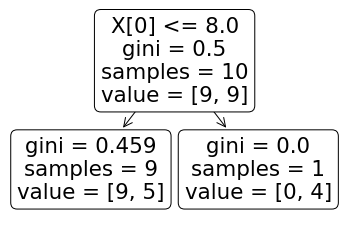

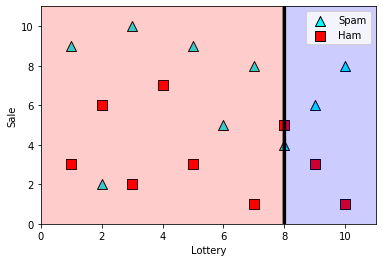

****************************** Estimator ******************************


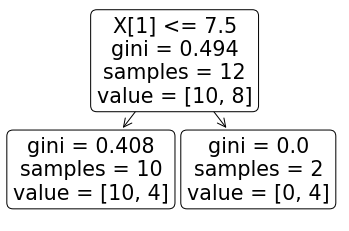

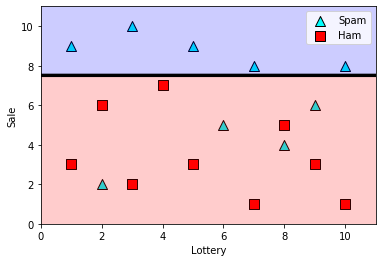

In [ ]:
for dt in random_forest_classifier.estimators_:
    print("*"*30, "Estimator", "*"*30)
    tree.plot_tree(dt, rounded=True)
    plt.show()
    utils.plot_model(features, labels, dt)
    plt.show()

# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Set the random_state so that we always get the same results
adaboost_classifier = AdaBoostClassifier(random_state=0, n_estimators=6)
adaboost_classifier.fit(features, labels)
adaboost_classifier.score(features, labels)

0.8888888888888888

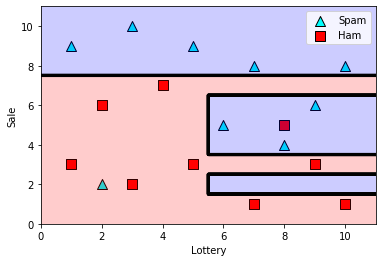

In [ ]:
utils.plot_model(features, labels, adaboost_classifier)

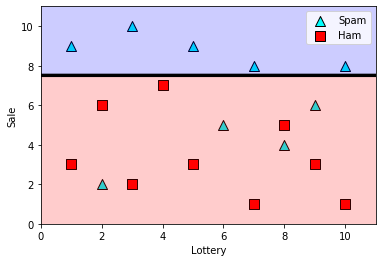

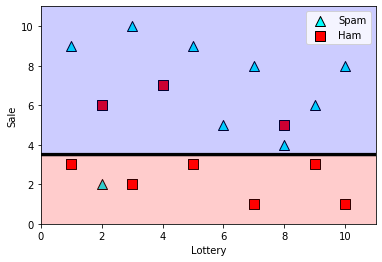

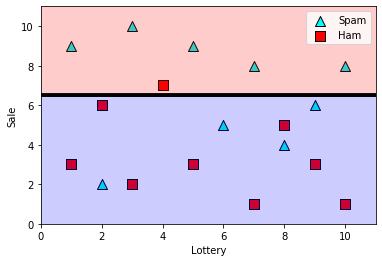

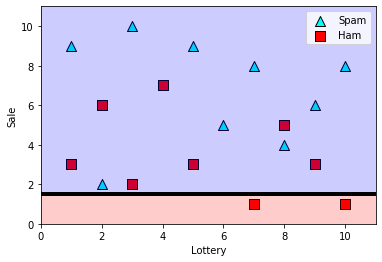

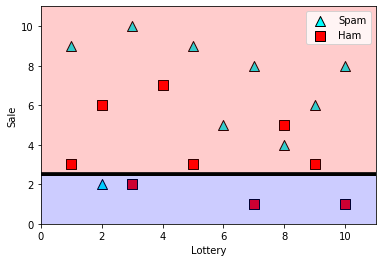

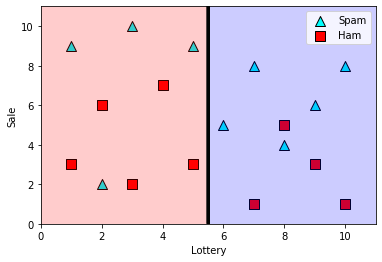

In [ ]:
estimators = adaboost_classifier.estimators_
for estimator in estimators:
    utils.plot_model(features, labels, estimator)
    plt.show()

In [ ]:
adaboost_classifier.estimator_weights_

array([1., 1., 1., 1., 1., 1.])

# Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(random_state=0, n_estimators=5)
gradient_boosting_classifier.fit(features, labels)
gradient_boosting_classifier.score(features, labels)

0.8888888888888888

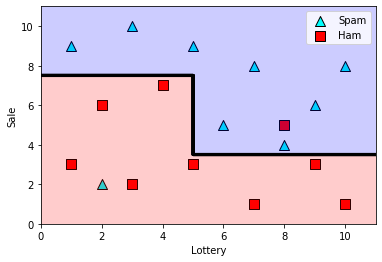

In [ ]:
utils.plot_model(features, labels, gradient_boosting_classifier)

In [ ]:
estimators = gradient_boosting_classifier.estimators_

As an example, let us plot the first of the estimators.

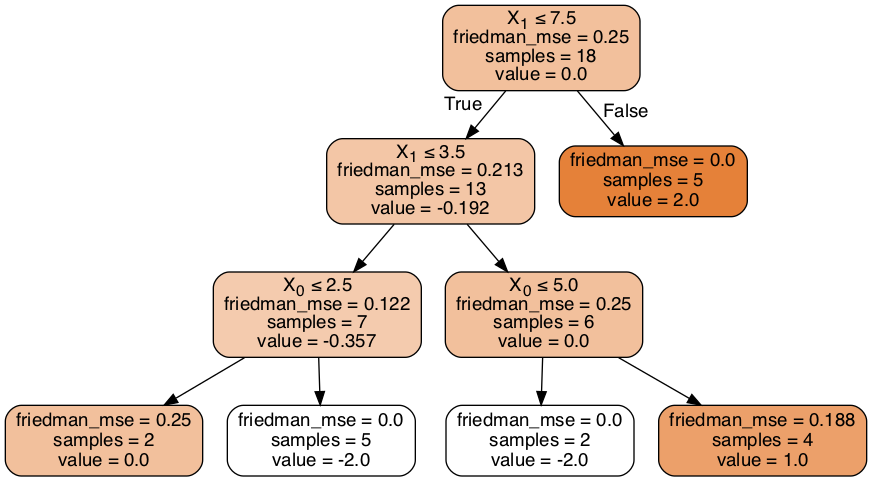

In [ ]:
utils.display_tree(estimators[0][0])

# XGBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier(random_state=0, n_estimators=5)
xgboost_classifier.fit(np.array(features), labels)
xgboost_classifier.score(np.array(features), labels)

0.8888888888888888

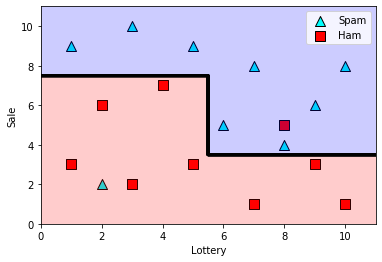

In [ ]:
utils.plot_model(features, labels, xgboost_classifier)